In [120]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import warnings
import pypsa
warnings.filterwarnings('ignore')

In [96]:
capacity_factors = pd.read_csv('capacity_factors.csv', index_col=0)
duration = pd.read_csv('duration.csv', header=None,index_col=0)
load = pd.read_csv('load.csv', header=None,index_col=0)
tech_data = pd.read_csv('tech_data.csv', index_col=0, skiprows=[1])

In [97]:
fuel_cost = tech_data['Fuel_P'].to_dict()
efficiency = tech_data['ETA_EL'].to_dict()
emissions = tech_data['EMF'].to_dict()
var_cost = tech_data['c_var_other'].to_dict()
colordict = {
    'CCGT': 'darkblue',
    'GT_GasOil': 'purple',
    'Hydro': 'aquamarine',
    'Coal': 'darkgray',
    'Lignite': 'brown',
    'Nuclear': 'orange',
    'Wind': 'dodgerblue',
    'Solar': 'yellow'
}
timelist = capacity_factors.columns.to_list()

In [98]:
mcp =[]
totalcost = []
totalemissions = []
generatormix = pd.DataFrame()

for time in timelist:
    power_plants = (tech_data['Cap']  * capacity_factors[time]).to_dict()
    
    n = pypsa.Network()
    n.add("Bus", "DE", carrier='AC')
    
    n.madd(
    "Carrier",
    tech_data.index.to_list(), 
    co2_emissions=emissions,
    color=list(colordict.values()))
    
    for tech, p_nom in power_plants.items():
        n.add("Generator",
            f"{tech}",
            bus="DE",
            carrier=tech,
            efficiency=efficiency.get(tech, 0),
            p_nom=p_nom,
            marginal_cost= (fuel_cost.get(tech, 0) / efficiency.get(tech, 0)) + var_cost.get(tech, 0) )
    
    n.add("Load",
    "Electricity demand",
    bus="DE",
    p_set=load[1][time],
    carrier='electricity',)

    n.optimize(solver_name='cbc')

    emiss = n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions)

    totalemissions.append(emiss.sum().sum())
    mcp.append(n.buses_t.marginal_price.values.item())
    totalcost.append(n.objective)
    generatormix = generatormix.append(n.generators_t.p, ignore_index=True)

Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-mytok6z7.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-ws30ual4.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 808863.78 Primal inf 38743.605 (1)
1  Obj 1178112.4
Optimal - objective value 1178112.4
After Postsolve, objective 1178112.4, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1178112.381 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-5wo_1p28.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-ojiszbqn.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 379630.35 Primal inf 54861.303 (1)
1  Obj 1009509.9
Optimal - objective value 1009509.9
After Postsolve, objective 1009509.9, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1009509.926 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-2qysgk31.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-y6yw8qsy.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 70109.72 Primal inf 63657.202 (1)
1  Obj 796651.82
Optimal - objective value 796651.82
After Postsolve, objective 796651.82, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 796651.8248 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-gbvbq9sv.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-o40zd_e4.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 61442 (1)
1  Obj 542280.23
Optimal - objective value 542280.23
After Postsolve, objective 542280.23, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 542280.2267 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-y3nh3o26.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-xylt526e.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 60430 (1)
1  Obj 406903.78
Optimal - objective value 406903.78
After Postsolve, objective 406903.78, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 406903.7795 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-otckw2h8.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-6a8zwcvn.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 57013 (1)
1  Obj 334394.9
Optimal - objective value 334394.9
After Postsolve, objective 334394.9, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 334394.8977 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-oeh8f055.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-sgcwiigv.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 52048 (1)
1  Obj 369931.19
Optimal - objective value 369931.19
After Postsolve, objective 369931.19, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 369931.1947 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-ypddwcva.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-x86bjhg4.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 48701 (1)
1  Obj 381602.88
Optimal - objective value 381602.88
After Postsolve, objective 381602.88, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 381602.8793 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-ei6x0d97.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-dlc9sr8p.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 7 (-1) columns and 7 (-17) elements
0  Obj 0 Primal inf 43981 (1)
1  Obj 224361.5
Optimal - objective value 224361.5
After Postsolve, objective 224361.5, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 224361.5025 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-ljuizhp_.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-hwv3qpoa.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 7 (-1) columns and 7 (-17) elements
0  Obj 0 Primal inf 40498 (1)
1  Obj 290149.72
Optimal - objective value 290149.72
After Postsolve, objective 290149.72, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 290149.7247 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



In [99]:
mcp_CO2 =[]
totalcost_CO2 = []
totalemissions_CO2 = []
generatormix_CO2 = pd.DataFrame()

for time in timelist:
    power_plants = (tech_data['Cap']  * capacity_factors[time]).to_dict()
    
    n1 = pypsa.Network()
    n1.add("Bus", "DE", carrier='AC')
    
    n1.madd(
    "Carrier",
    tech_data.index.to_list(), 
    co2_emissions=emissions,
    color=list(colordict.values()))
    
    for tech, p_nom in power_plants.items():
        n1.add("Generator",
            f"{tech}",
            bus="DE",
            carrier=tech,
            efficiency=efficiency.get(tech, 0),
            p_nom=p_nom,
            marginal_cost= (fuel_cost.get(tech, 0) / efficiency.get(tech, 0)) + var_cost.get(tech, 0) + (emissions.get(tech,0)/efficiency.get(tech, 0) * 120))
    
    n1.add("Load",
    "Electricity demand",
    bus="DE",
    p_set=load[1][time],
    carrier='electricity',)

    n1.optimize(solver_name='cbc')

    emiss1 = n1.generators_t.p / n1.generators.efficiency * n1.generators.carrier.map(n1.carriers.co2_emissions)

    totalemissions_CO2.append(emiss1.sum().sum())
    mcp_CO2.append(n1.buses_t.marginal_price.values.item())
    totalcost_CO2.append(n1.objective)
    generatormix_CO2 = generatormix_CO2.append(n1.generators_t.p, ignore_index=True)

Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-in37wre1.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-t6nd0cp4.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 3880263 Primal inf 38743.605 (1)
1  Obj 5611453
Optimal - objective value 5611453
After Postsolve, objective 5611453, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 5611453.046 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-w8jocwdn.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-uruheagb.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 1842399.3 Primal inf 54861.303 (1)
1  Obj 5103273.8
Optimal - objective value 5103273.8
After Postsolve, objective 5103273.8, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 5103273.788 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-3tiocvg5.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-iv_28604.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 344902.82 Primal inf 63657.202 (1)
1  Obj 4137784.2
Optimal - objective value 4137784.2
After Postsolve, objective 4137784.2, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 4137784.188 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-ufw_nx_6.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-umeeqgfl.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 61442 (1)
1  Obj 2891228.4
Optimal - objective value 2891228.4
After Postsolve, objective 2891228.4, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 2891228.392 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-gb6x1cmd.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-9ulaechw.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 60430 (1)
1  Obj 2041069.2
Optimal - objective value 2041069.2
After Postsolve, objective 2041069.2, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 2041069.206 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-hsyra66t.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-blhv5u8v.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 57013 (1)
1  Obj 1665358.4
Optimal - objective value 1665358.4
After Postsolve, objective 1665358.4, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1665358.437 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-rzkkn1j4.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-_dgf20ft.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 52048 (1)
1  Obj 1922347.9
Optimal - objective value 1922347.9
After Postsolve, objective 1922347.9, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1922347.893 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-lvkzey5o.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-ybdvvfga.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 8 (0) columns and 8 (-16) elements
0  Obj 0 Primal inf 48701 (1)
1  Obj 1915290.1
Optimal - objective value 1915290.1
After Postsolve, objective 1915290.1, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1915290.097 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-ufq2d6tm.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-9noj3h0v.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 7 (-1) columns and 7 (-17) elements
0  Obj 0 Primal inf 43981 (1)
1  Obj 1049955.3
Optimal - objective value 1049955.3
After Postsolve, objective 1049955.3, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1049955.315 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
INFO:linopy.model: Solve linea

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - cbc -printingOptions all -import C:\Users\taher\AppData\Local\Temp\linopy-problem-pg0z5vi3.lp -solve -solu C:\Users\taher\AppData\Local\Temp\linopy-solve-0ljg0tcu.sol  (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 1 (-16) rows, 7 (-1) columns and 7 (-17) elements
0  Obj 0 Primal inf 40498 (1)
1  Obj 1559188.3
Optimal - objective value 1559188.3
After Postsolve, objective 1559188.3, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1559188.348 - 1 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



In [100]:
generatormix.index = load.index.to_list()
generatormix = generatormix.rename_axis('Time Segment')
generatormix = generatormix.rename_axis('Generator [GWh]',axis='columns')
generatormix = (generatormix * duration.values)/1e3

generatormix_CO2.index = load.index.to_list()
generatormix_CO2 = generatormix_CO2.rename_axis('Time Segment')
generatormix_CO2 = generatormix_CO2.rename_axis('Generator [GWh]',axis='columns')
generatormix_CO2 = (generatormix_CO2 * duration.values) /1e3

actual_cap = ((tech_data['Cap'] * capacity_factors.T) * duration.values)/1e3

In [101]:
mcdict = n.generators.marginal_cost.to_dict()
rounded_dict = {key: round(value, 3) for key, value in mcdict.items()}
swapped_dict = {value: key for key, value in rounded_dict.items()}
mcdict = n1.generators.marginal_cost.to_dict()
rounded_dict = {key: round(value, 3) for key, value in mcdict.items()}
swapped_dict1 = {value: key for key, value in rounded_dict.items()}

In [102]:
optimized_data = pd.DataFrame()
optimized_data['MCP [€/MWh]'] = mcp
optimized_data['MCP [€/MWh]'] = optimized_data['MCP [€/MWh]'].round(3)
optimized_data['System Cost [€]'] = (totalcost  * duration[1]).values
optimized_data['Emissions [tCO2]'] = (totalemissions * duration[1]).values
optimized_data['MC Tech'] = optimized_data['MCP [€/MWh]'].map(swapped_dict)
optimized_data.index = load.index.to_list()
optimized_data = optimized_data.rename_axis('Time Segment')

In [103]:
optimized_data_CO2 = pd.DataFrame()
optimized_data_CO2['MCP [€/MWh]'] = mcp_CO2
optimized_data_CO2['MCP [€/MWh]'] = optimized_data_CO2['MCP [€/MWh]'].round(3)
optimized_data_CO2['System Cost [€]'] = (totalcost_CO2 * duration[1]).values
optimized_data_CO2['Emissions [tCO2]'] = (totalemissions_CO2 * duration[1]).values
optimized_data_CO2['MC Tech'] = optimized_data_CO2['MCP [€/MWh]'].map(swapped_dict1)
optimized_data_CO2.index = load.index.to_list()
optimized_data_CO2 = optimized_data_CO2.rename_axis('Time Segment')

In [104]:
syscost = optimized_data['System Cost [€]'].sum()/1e9
syscost_CO2 = optimized_data_CO2['System Cost [€]'].sum()/1e9
sysemiss = optimized_data['Emissions [tCO2]'].sum()/1e6
sysemiss_CO2 = optimized_data_CO2['Emissions [tCO2]'].sum()/1e6

In [105]:
listofdfs = []

for index, row in actual_cap.iterrows():
    new_df = pd.DataFrame(row)
    new_df.index = actual_cap.columns
    new_df.columns = ['Available capacity (GWh)']
    new_df['SMTGC'] = n.generators.marginal_cost
    new_df['color'] = list(colordict.values())
    
    new_df = new_df.sort_values(by=['SMTGC'], ascending=True)
    new_df = new_df.reset_index(drop=True)
    new_df["Cumulative capacity (GWh)"] = new_df["Available capacity (GWh)"].cumsum()
    new_df = new_df.sort_values(by=['Cumulative capacity (GWh)'], ascending=True)

    new_df["xpos"] = ""

    for index in new_df.index:

        i = new_df.index.get_loc(index)

        if index == 0:    #First index
            new_df.loc[index, "xpos"] = new_df.loc[index, "Available capacity (GWh)"]/2

        else:
            #Sum of cumulative capacity in the row above and the half of available capacity in
            new_df.loc[index, "xpos"] = new_df.loc[index, "Available capacity (GWh)"]/2 + new_df.iloc[i-1, -2]
    
    new_df.index = n.generators.marginal_cost.index
    
    listofdfs.append(new_df)

In [106]:
listofdfs_CO2 = []

for index, row in actual_cap.iterrows():
    new_df = pd.DataFrame(row)
    new_df.index = actual_cap.columns
    new_df.columns = ['Available capacity (GWh)']
    new_df['SMTGC'] = n1.generators.marginal_cost
    new_df['color'] = list(colordict.values())
    
    new_df = new_df.sort_values(by=['SMTGC'], ascending=True)
    new_df = new_df.reset_index(drop=True)
    new_df["Cumulative capacity (GWh)"] = new_df["Available capacity (GWh)"].cumsum()
    new_df = new_df.sort_values(by=['Cumulative capacity (GWh)'], ascending=True)

    new_df["xpos"] = ""

    for index in new_df.index:

        i = new_df.index.get_loc(index)

        if index == 0:    #First index
            new_df.loc[index, "xpos"] = new_df.loc[index, "Available capacity (GWh)"]/2

        else:
            #Sum of cumulative capacity in the row above and the half of available capacity in
            new_df.loc[index, "xpos"] = new_df.loc[index, "Available capacity (GWh)"]/2 + new_df.iloc[i-1, -2]
    
    new_df.index = n1.generators.marginal_cost.index
    
    listofdfs_CO2.append(new_df)

### Functions for Plotting

In [107]:
def moc_segs(dflist, segname, mcp, load, string):
    
    # Creating a subplot
    fig, axes = plt.subplots(5, 2, figsize=(20, 40))
    fig.subplots_adjust(hspace=1, wspace=1, top=1)  # Adjusting the spacing between subplots

    # Iterating over the dataframes and plotting the bar plots
    for i, ax in enumerate(axes.flat):
        if i < len(dflist):
            df = dflist[i]
            xpos = df["xpos"].values.tolist()
            y = df["SMTGC"].values.tolist() # y-axis
            w = df["Available capacity (GWh)"].values.tolist()
            colors = df["color"].tolist()
            ax.bar(xpos,
                  height = y,
                  width = w,
                  fill = True,
                  color = colors)# Assuming 'values' is the column with values in each dataframe
            ax.set_title(f"Segment - {segname[i]}", fontsize=12)  # Setting subplot title
            ax.set_xlabel("Power plant capacity (GWh)", fontsize=10)
            ax.set_ylabel("Marginal Cost (€/MWh)", fontsize=10)
            ax.axhline(mcp[segname[i]], color='red', linewidth=0.5, linestyle ='--')
            ax.axvline(load[segname[i]], color='red', linewidth=0.5, linestyle ='-.')
            
            #ax.text(0.15, 0.4, f'MCP - {mcp[segname[i]]}', transform=ax.transAxes)
            ylim = ax.get_ylim()
            xlim = ax.get_xlim()
            ax.text(xlim[1]/10, mcp[segname[i]], f'MCP - {mcp[segname[i]]} €/MWh', ha='center', va='bottom')
            ax.text(load[segname[i]]-(xlim[1]*(1.5/10)), ylim[1]*(8/10), f'Annual Demand - {load[segname[i]]} GWh', ha='center', va='bottom')


    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colordict.values()]
    labels = colordict.keys()
    fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=10, bbox_to_anchor=(0.5, 0.96))
        
    plt.suptitle(f'Merit Order Plots {string}', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    #plt.tight_layout()
    plt.show()


### Plots

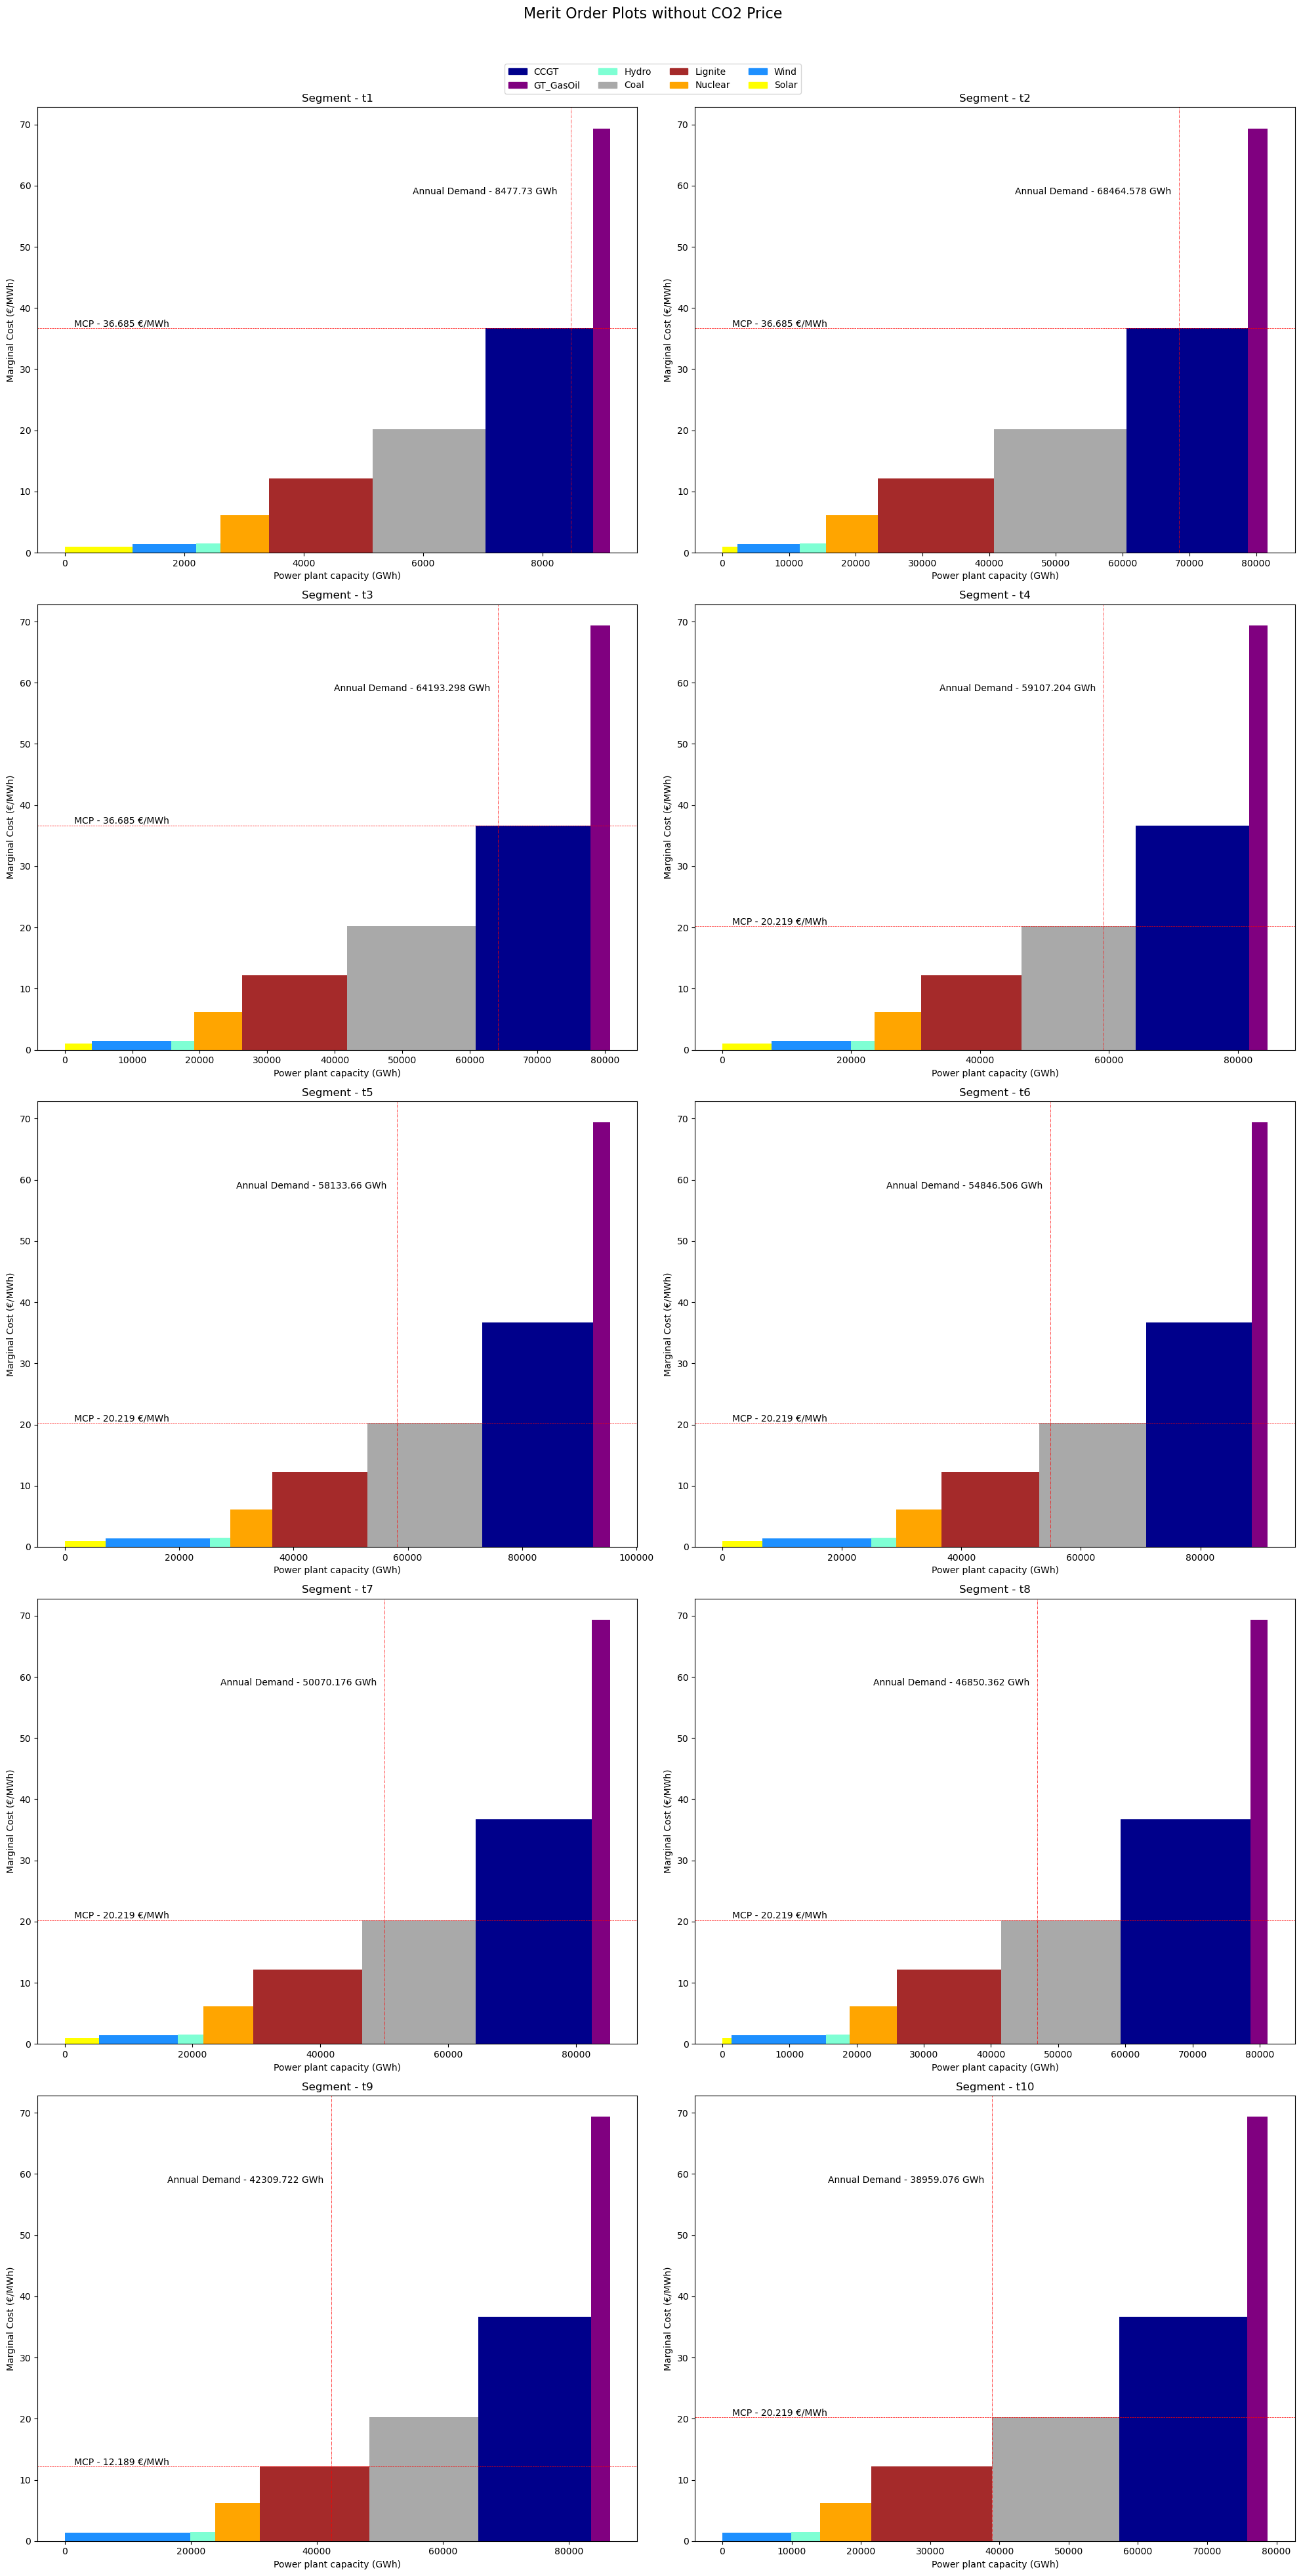

In [108]:
moc_segs(listofdfs, actual_cap.index, optimized_data['MCP [€/MWh]'], ((load * duration.values)/1e3)[1], 'without CO2 Price')

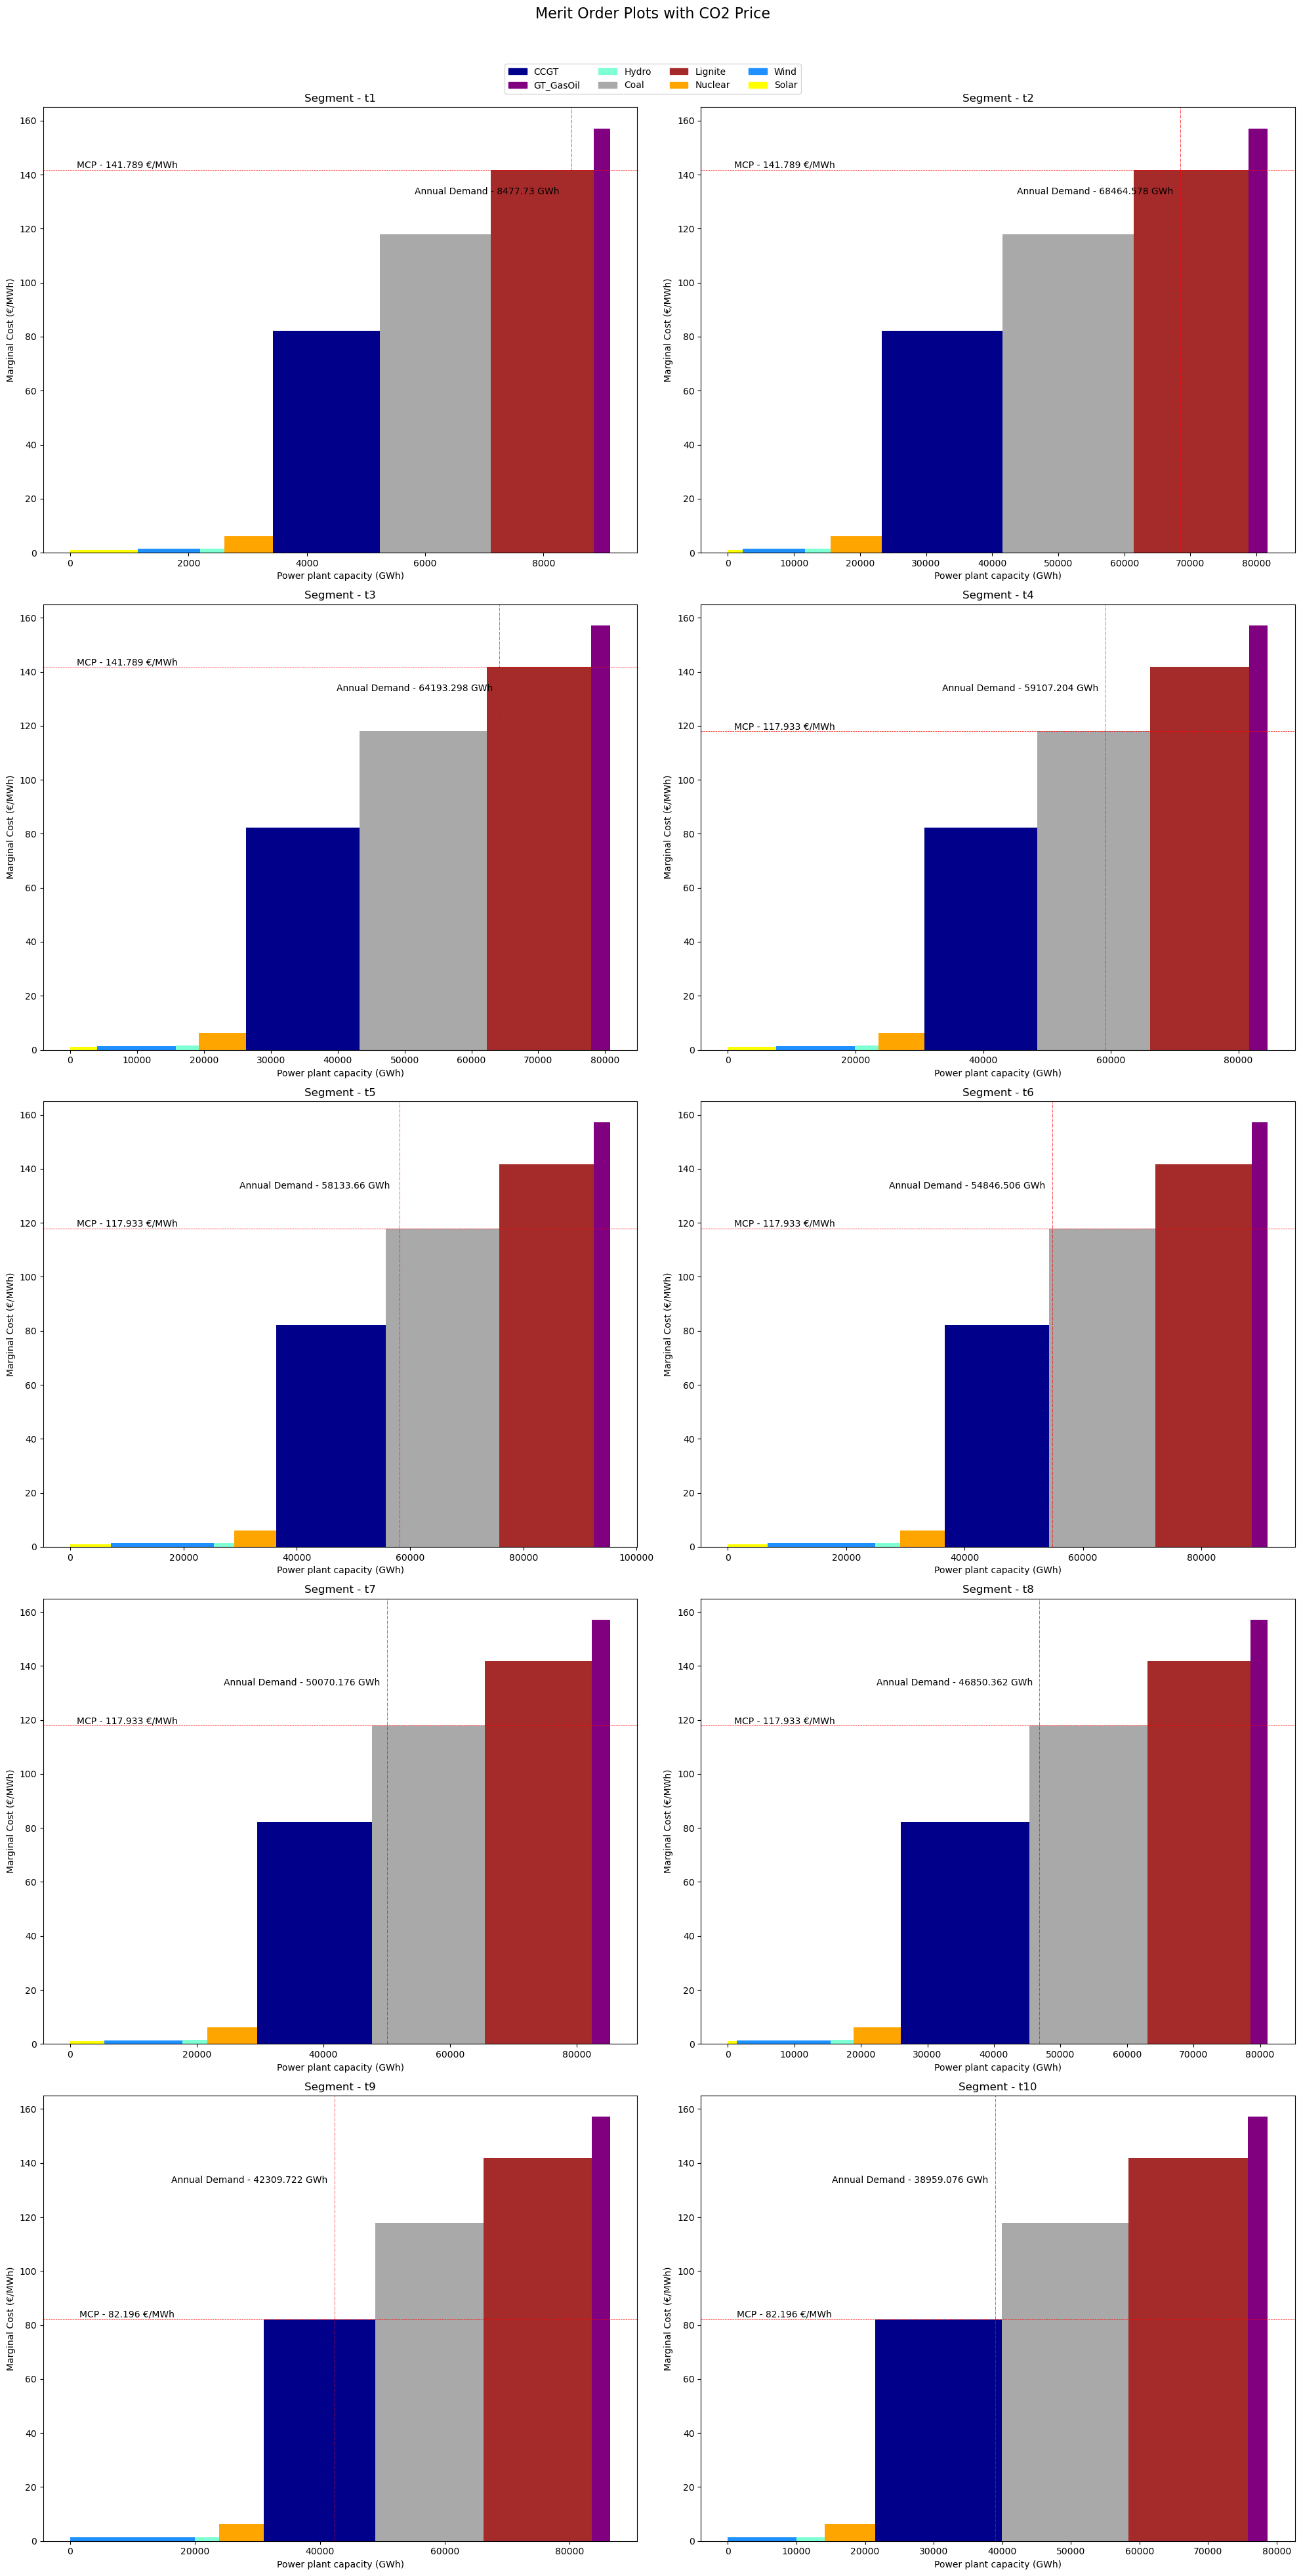

In [109]:
moc_segs(listofdfs_CO2, actual_cap.index, optimized_data_CO2['MCP [€/MWh]'], ((load * duration.values)/1e3)[1], 'with CO2 Price')

In [110]:
mcpplot = pd.DataFrame({
    'MCP [€/MWh]': optimized_data.iloc[:, 0],
    'MC Tech': optimized_data.iloc[:, -1]
    })
mcpplot.index = optimized_data.index
mcpplot['color'] = mcpplot['MC Tech'].map(colordict)

mcpplot_CO2 = pd.DataFrame({
    'MCP [€/MWh]': optimized_data_CO2.iloc[:, 0],
    'MC Tech': optimized_data_CO2.iloc[:, -1]
    })
mcpplot_CO2.index = optimized_data_CO2.index
mcpplot_CO2['color'] = mcpplot_CO2['MC Tech'].map(colordict)

unique_dict = dict(zip(mcpplot['MC Tech'].unique(), mcpplot['color'].unique()))
unique_dict_CO2 = dict(zip(mcpplot_CO2['MC Tech'].unique(), mcpplot_CO2['color'].unique()))
unique_dict.update(unique_dict_CO2)

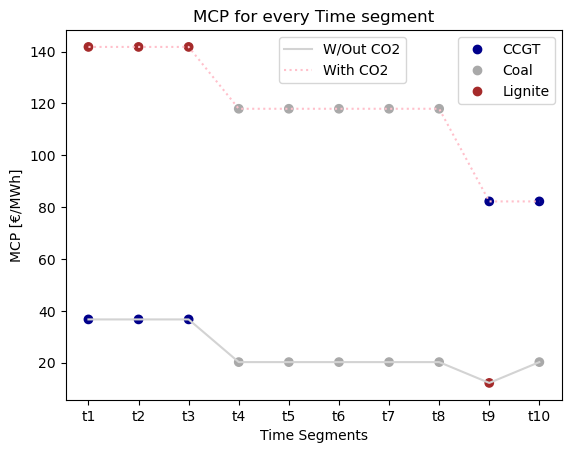

In [140]:
# Create a figure and axes
fig, ax = plt.subplots()
plt.set_loglevel('Warning')

# Line plots
line1, = ax.plot(mcpplot.index, mcpplot['MCP [€/MWh]'], label='W/Out CO2', linestyle='solid', color='lightgray')
line2, = ax.plot(mcpplot_CO2.index, mcpplot_CO2['MCP [€/MWh]'], label='With CO2',linestyle='dotted', color='pink')

# Scatter plots
ax.scatter(mcpplot.index, mcpplot['MCP [€/MWh]'], marker='o', color=mcpplot['color'])
ax.scatter(mcpplot_CO2.index, mcpplot_CO2['MCP [€/MWh]'], marker='o', color=mcpplot_CO2['color'])

# Customize the plot
ax.set_xlabel('Time Segments')
ax.set_ylabel('MCP [€/MWh]')
ax.set_title('MCP for every Time segment')

custom_handles = [plt.Line2D([], [], marker='o', color=unique_dict[label], linestyle='None') for label in unique_dict]
custom_labels = list(unique_dict.keys())

# Add the second legend manually
scatter_legend = ax.legend(custom_handles, custom_labels, loc='upper right')
ax.legend(handles=[line1, line2], bbox_to_anchor=(0.7,1))

ax.add_artist(scatter_legend)

# Display the plot
plt.show()


### Results

In [112]:
print(f'The annual cost of the system without CO2 price is € {round(syscost,3)} Billion')
print(f'The annual cost of the system with CO2 price is € {round(syscost_CO2,3)} Billion')
print(f'The annual emissions of the system without CO2 price is {round(sysemiss,1)} MtCO2')
print(f'The annual emissions of the system with CO2 price is {round(sysemiss_CO2,1)} MtCO2')

The annual cost of the system without CO2 price is € 4.31 Billion
The annual cost of the system with CO2 price is € 22.011 Billion
The annual emissions of the system without CO2 price is 217.4 MtCO2
The annual emissions of the system with CO2 price is 118.6 MtCO2


In [113]:
generatormix

Generator [GWh],CCGT,GT_GasOil,Hydro,Coal,Lignite,Nuclear,Wind,Solar
Time Segment,,,,,,,,
t1,1437.078,0.0,413.712,1881.900,1735.020,813.960,1057.74,1138.32
t2,7842.224,0.0,3951.896,19913.400,17373.720,7757.568,9389.12,2236.65
t3,3345.836,0.0,3451.656,19047.600,15555.540,7030.296,11736.40,4025.97
t4,0.000,0.0,3701.776,12730.146,15555.540,7191.912,12323.22,7604.61
t5,0.000,0.0,3551.704,5233.280,16565.640,7434.336,18191.42,7157.28
t6,0.000,0.0,4151.992,1833.572,16363.620,7595.952,18191.42,6709.95
t7,0.000,0.0,4001.920,3569.020,16969.680,7838.376,12323.22,5367.96
t8,0.000,0.0,3501.680,5337.176,15555.540,7030.296,14083.68,1341.99
t9,0.000,0.0,3901.872,0.000,11344.866,7111.104,19951.88,0.00


In [114]:
generatormix_CO2

Generator [GWh],CCGT,GT_GasOil,Hydro,Coal,Lignite,Nuclear,Wind,Solar
Time Segment,,,,,,,,
t1,1805.400,0.0,413.712,1881.900,1366.698,813.960,1057.74,1138.32
t2,18181.800,0.0,3951.896,19913.400,7034.144,7757.568,9389.12,2236.65
t3,17027.400,0.0,3451.656,19047.600,1873.976,7030.296,11736.40,4025.97
t4,17604.600,0.0,3701.776,10681.086,0.000,7191.912,12323.22,7604.61
t5,19336.200,0.0,3551.704,2462.720,0.000,7434.336,18191.42,7157.28
t6,17604.600,0.0,4151.992,592.592,0.000,7595.952,18191.42,6709.95
t7,18181.800,0.0,4001.920,2356.900,0.000,7838.376,12323.22,5367.96
t8,19336.200,0.0,3501.680,1556.516,0.000,7030.296,14083.68,1341.99
t9,11344.866,0.0,3901.872,0.000,0.000,7111.104,19951.88,0.00


In [115]:
optimized_data

,MCP [€/MWh],System Cost [€],Emissions [tCO2],MC Tech
Time Segment,,,,
t1,36.685,1.201675e+08,3.951251e+06,CCGT
t2,36.685,9.711485e+08,3.795305e+07,CCGT
t3,36.685,7.663791e+08,3.357911e+07,CCGT
t4,20.219,5.216736e+08,2.716596e+07,Coal
t5,20.219,3.914414e+08,2.215228e+07,Coal
t6,20.219,3.216879e+08,1.916576e+07,Coal
t7,20.219,3.558738e+08,2.123346e+07,Coal
t8,20.219,3.671020e+08,2.114597e+07,Coal
t9,12.189,2.158358e+08,1.225246e+07,Lignite


In [116]:
optimized_data_CO2

,MCP [€/MWh],System Cost [€],Emissions [tCO2],MC Tech
Time Segment,,,,
t1,141.789,5.723682e+08,3.693153e+06,Lignite
t2,141.789,4.909349e+09,3.070769e+07,Lignite
t3,141.789,3.980548e+09,2.399188e+07,Lignite
t4,117.933,2.781362e+09,1.537416e+07,Coal
t5,117.933,1.963509e+09,9.338791e+06,Coal
t6,117.933,1.602075e+09,7.159247e+06,Coal
t7,117.933,1.849299e+09,8.814806e+06,Coal
t8,117.933,1.842509e+09,8.600882e+06,Coal
t9,82.196,1.010057e+09,4.302645e+06,CCGT


In [117]:
# Checking if the total annual capacity produced is equal to the total annual demand
round(generatormix.sum().sum(),3) == float((load * duration).sum()/1e3)

True

In [118]:
# Checking if the total capacity produced is same with and without CO2 price
generatormix.sum().sum() == generatormix_CO2.sum().sum()

True